# Chapter 5. Graphical Representations of Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from googlefinance.client import get_price_data, get_prices_data
import pandas as pd

In [22]:
params = [
    {
        'q': "AAPL",
        'x': "NASDAQ",},
    {
        'q': "MSFT",
        'x': "NASDAQ",}
]
period = "10Y"
start = pd.to_datetime('2014-01-01').date()
end = pd.to_datetime('2015-01-01').date()

df = get_prices_data(params, period)[start:end]

In [23]:
data = pd.DataFrame()
data['AAPL'] = df['AAPL_Close']
data['MSFT'] = df['MSFT_Close']

In [24]:
data.head()

,AAPL,MSFT
2014-01-01,80.1500,37.41
2014-01-03,79.0190,37.16
2014-01-04,77.2800,36.91
2014-01-07,77.7000,36.13
2014-01-08,77.1482,36.41


In [25]:
data['MSFT'].head()

2014-01-01    37.41
2014-01-03    37.16
2014-01-04    36.91
2014-01-07    36.13
2014-01-08    36.41
Name: MSFT, dtype: float64

## Histogram

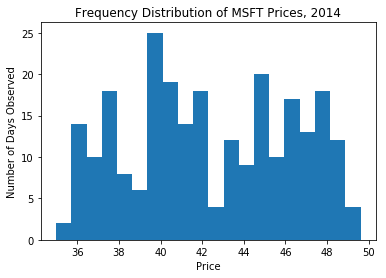

In [26]:
# Plot a histogram using 20 bins
plt.hist(data['MSFT'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Prices, 2014');

### Returns Histogram

Finance 에서는 price 의 분산은 잘 다루지 않는다. 이유는 price 가 non-stationary 하고 움직임이 심하기 때문이다. 그 대신 daily return 을 사용한다.

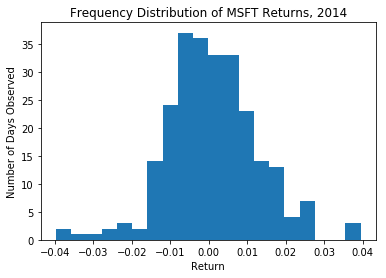

In [28]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Returns, 2014');

위 그래프에서 알 수 있는 것은 Microsoft 의 일일 수익율이 0.03 이상이었던 날은 2015 년에 5 일 미만이었다는 것이다. 

### 누적 histogram (Cumulative Histogram) (Discrete Estimated CDF)

data 를 나타내는 또다른 방법은 cumulative distribution 함수를 사용하는 것이다. 여기서 bar 의 높이는 bin 에서 관측된 data 를 포함한 이전의 bin 들의 data 숫자를 나타낸다.

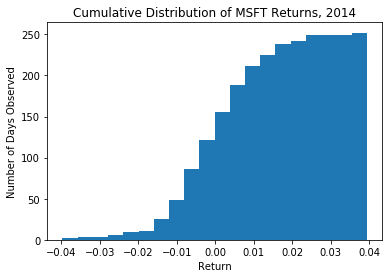

In [29]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of MSFT Returns, 2014');

## Scatter plot

산점도는 두개의 dataset 간의 관계를 시각화 한 것이다. 

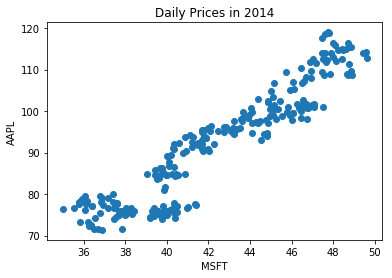

In [30]:
plt.scatter(data['MSFT'], data['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Prices in 2014');

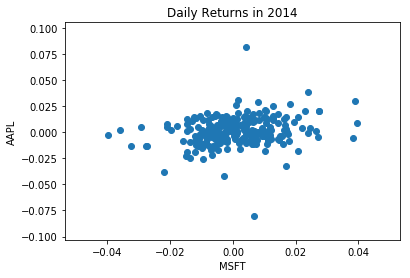

In [31]:
R_msft = data['MSFT'].pct_change()[1:]
R_aapl = data['AAPL'].pct_change()[1:]

plt.scatter(R_msft, R_aapl)
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Returns in 2014');

# Line graph

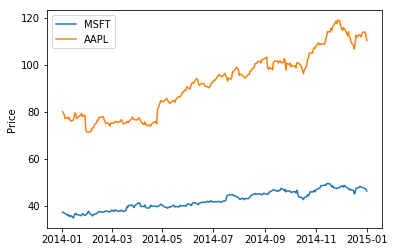

In [32]:
plt.plot(data['MSFT'])
plt.plot(data['AAPL'])
plt.ylabel('Price')
plt.legend(['MSFT', 'AAPL']);

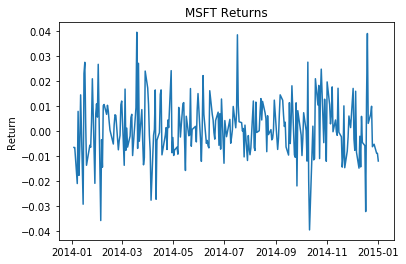

In [33]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

plt.plot(R)
plt.ylabel('Return')
plt.title('MSFT Returns');